# **Regression**

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *

EDA analysis

In [3]:
df = pd.read_csv('D:\\python-project\\classification_regression\\dataset_house_chotot.txt')

In [4]:
df.head()

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia,USD,log_price
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",Quận 7,Đã bàn giao,62.0,2.0,NaN,NaN,2.0,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,2.000000e+09,83333.0,11.330600
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",Quận 7,Đã bàn giao,95.0,3.0,NaN,NaN,2.0,Chung cư,Đang chờ sổ,NaN,Nội thất cao cấp,NaN,NaN,Căn góc,5.300000e+09,220833.0,12.305162
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",Quận Bình Tân,Chưa bàn giao,75.0,2.0,2,5.0,2.0,Chung cư,Giấy tờ khác,17,NaN,Đông Nam,Đông Nam,NaN,2.580000e+09,107500.0,11.585246
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",Quận Tân Bình,Đã bàn giao,70.0,1.0,A,7.0,1.0,Chung cư,Đang chờ sổ,BPA - 0712,Nội thất cao cấp,Đông Nam,Tây Bắc,NaN,4.000000e+09,166667.0,12.023753
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",Quận 6,Đã bàn giao,83.0,2.0,NaN,NaN,2.0,Chung cư,Đã có sổ,NaN,Nội thất cao cấp,Tây Bắc,NaN,NaN,2.950000e+09,122917.0,11.719265


In [5]:
df.corr()

,DienTich,Phongngu,SoTang,PhongTam,Gia,USD,log_price
DienTich,1.000000,0.620877,0.147674,0.614645,0.194862,0.194862,0.383405
Phongngu,0.620877,1.000000,0.082663,0.733788,0.130633,0.130633,0.266293
SoTang,0.147674,0.082663,1.000000,0.187252,0.027957,0.027957,0.057572
PhongTam,0.614645,0.733788,0.187252,1.000000,0.118073,0.118073,0.256122
Gia,0.194862,0.130633,0.027957,0.118073,1.000000,1.000000,0.253402
USD,0.194862,0.130633,0.027957,0.118073,1.000000,1.000000,0.253402
log_price,0.383405,0.266293,0.057572,0.256122,0.253402,0.253402,1.000000


<Axes: xlabel='Phongngu', ylabel='USD'>

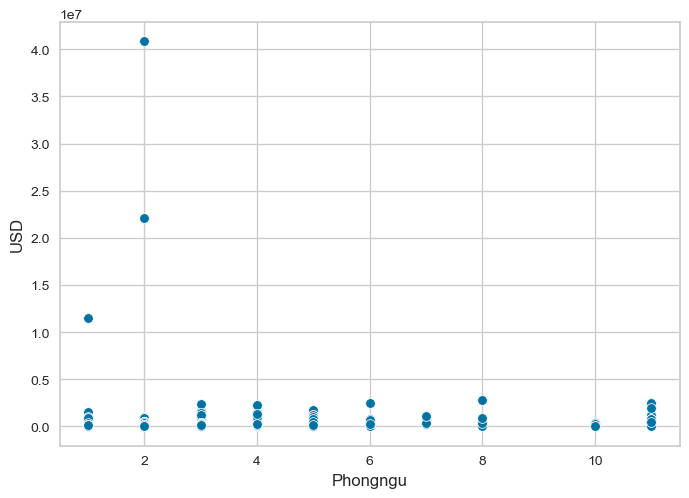

In [6]:
sns.scatterplot(x='Phongngu', y='USD', data=df[['Phongngu','USD']])

<Axes: xlabel='DienTich', ylabel='USD'>

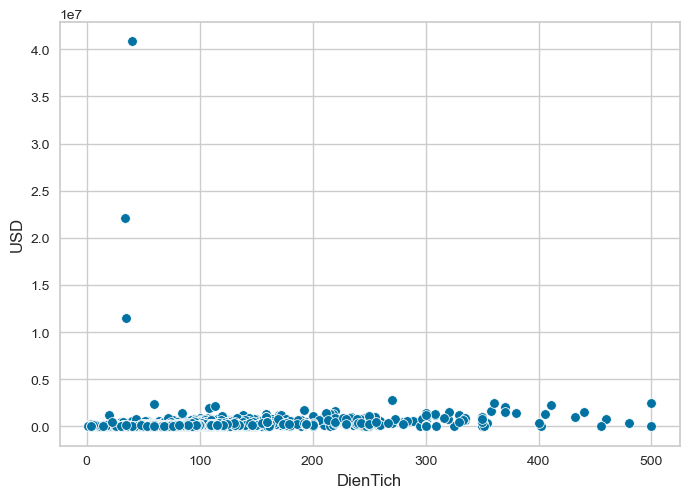

In [7]:
sns.scatterplot(x='DienTich',y='USD',data=df[['DienTich','USD']])

In [8]:
df['Quan'].value_counts()

 Quận 7              2914
 Quận 9              2777
 Quận 8              2422
 Quận Bình Tân       2165
 Quận Thủ Đức        1988
 Quận 2              1807
 Quận Tân Phú        1462
 Huyện Nhà Bè        1091
 Quận Bình Thạnh      956
 Quận 12              888
 Quận Tân Bình        786
 Huyện Bình Chánh     727
 Quận 6               683
 Quận Phú Nhuận       641
 Quận Gò Vấp          608
 Quận 10              474
 Quận 4               406
 Huyện Hóc Môn        346
 Quận 5               343
 Quận 1               318
 Quận 3               108
 Quận 11               97
 Huyện Củ Chi          12
Name: Quan, dtype: int64

Transform data to categorical

In [9]:
df['Quan'] = df['Quan'].astype('category')
df['TinhTrangBDS'] = df['TinhTrangBDS'].astype('category')
df['Loai'] = df['Loai'].astype('category')
df['GiayTo'] = df['GiayTo'].astype('category')
df['Quan_encode'] = df['Quan'].cat.codes
df['TinhTrangBDS_encode'] = df['TinhTrangBDS'].cat.codes
df['Loai_encode'] = df['Loai'].cat.codes
df['GiayTo_encode'] = df['GiayTo'].cat.codes

In [10]:
model_df = df[['Quan_encode','TinhTrangBDS_encode','Loai_encode','GiayTo_encode','DienTich','PhongTam','Phongngu','USD']]

In [11]:
d7 = model_df[model_df['Quan_encode'] == 13]

In [12]:
d7

,Quan_encode,TinhTrangBDS_encode,Loai_encode,GiayTo_encode,DienTich,PhongTam,Phongngu,USD
0,13,1,2,2,62.00,2.0,2.0,83333.0
1,13,1,2,1,95.00,2.0,3.0,220833.0
29,13,1,2,1,95.00,2.0,3.0,220833.0
46,13,1,4,1,49.00,1.0,1.0,82083.0
48,13,1,2,2,90.00,2.0,2.0,183333.0
...,...,...,...,...,...,...,...,...
23980,13,0,2,0,57.32,1.0,2.0,92956.0
23986,13,1,2,1,50.00,1.0,1.0,61667.0
23987,13,1,0,-1,40.00,1.0,1.0,41250.0
24005,13,0,2,2,66.00,2.0,2.0,87500.0


In [13]:
d7_apartment = d7[d7['Loai_encode']==2]
d7_test = d7_apartment[d7_apartment['GiayTo_encode']==2]

In [14]:
d7_test[['DienTich','USD']]

,DienTich,USD
0,62.00,83333.0
48,90.00,183333.0
52,62.00,83333.0
113,106.00,162500.0
137,62.00,83333.0
...,...,...
23950,70.12,118750.0
23966,70.00,91667.0
23973,97.60,204167.0
23976,70.00,114583.0


In [15]:
d7_test.corr()

,Quan_encode,TinhTrangBDS_encode,Loai_encode,GiayTo_encode,DienTich,PhongTam,Phongngu,USD
Quan_encode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TinhTrangBDS_encode,NaN,1.000000,NaN,NaN,0.047024,0.026049,0.000297,0.082402
Loai_encode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GiayTo_encode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DienTich,NaN,0.047024,NaN,NaN,1.000000,0.582885,0.762970,0.764582
PhongTam,NaN,0.026049,NaN,NaN,0.582885,1.000000,0.608132,0.392964
Phongngu,NaN,0.000297,NaN,NaN,0.762970,0.608132,1.000000,0.636807
USD,NaN,0.082402,NaN,NaN,0.764582,0.392964,0.636807,1.000000


Preprocessing data (scaling & standardizing)

In [16]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

In [17]:
scale = StandardScaler()

In [18]:
scaled_df = scale.fit_transform(model_df)
scaled_df

array([[-0.07849519,  0.53519502, -0.04798343, ...,  0.4092029 ,
        -0.06736718, -0.10786968],
       [-0.07849519,  0.53519502, -0.04798343, ...,  0.4092029 ,
         1.28329413,  0.31584077],
       [ 0.62460978, -1.86668264, -0.04798343, ...,  0.4092029 ,
        -0.06736718, -0.03339833],
       ...,
       [ 0.09728105,  0.53519502, -0.04798343, ...,  0.4092029 ,
        -0.06736718,  0.05904759],
       [ 0.44883354,  0.53519502, -0.04798343, ...,  0.4092029 ,
        -0.06736718, -0.0244095 ],
       [-0.25427143, -1.86668264, -0.04798343, ..., -1.24045209,
        -0.06736718, -0.12070733]])

In [19]:
model_df

,Quan_encode,TinhTrangBDS_encode,Loai_encode,GiayTo_encode,DienTich,PhongTam,Phongngu,USD
0,13,1,2,2,62.0,2.0,2.0,83333.0
1,13,1,2,1,95.0,2.0,3.0,220833.0
2,17,0,2,0,75.0,2.0,2.0,107500.0
3,21,1,2,1,70.0,1.0,1.0,166667.0
4,12,1,2,2,83.0,2.0,2.0,122917.0
...,...,...,...,...,...,...,...,...
24014,15,1,2,1,53.0,1.0,2.0,87500.0
24015,0,1,2,2,76.0,1.0,2.0,64583.0
24016,14,1,2,2,115.0,2.0,2.0,137500.0
24017,16,1,2,2,82.0,2.0,2.0,110417.0


In [20]:
pd.options.display.float_format = '{:20,.2f}'.format

In [21]:
model_df['USD'].describe()

count              24,019.00
mean              118,338.23
std               324,520.82
min                    42.00
25%                67,917.00
50%                94,583.00
75%               137,500.00
max            40,833,333.00
Name: USD, dtype: float64

In [22]:
model_df = model_df[model_df['USD'] <= 200000]

In [23]:
model_df['USD'].describe()

count              21,438.00
mean               91,774.17
std                43,167.71
min                    42.00
25%                66,667.00
50%                87,500.00
75%               118,750.00
max               200,000.00
Name: USD, dtype: float64

<Axes: ylabel='USD'>

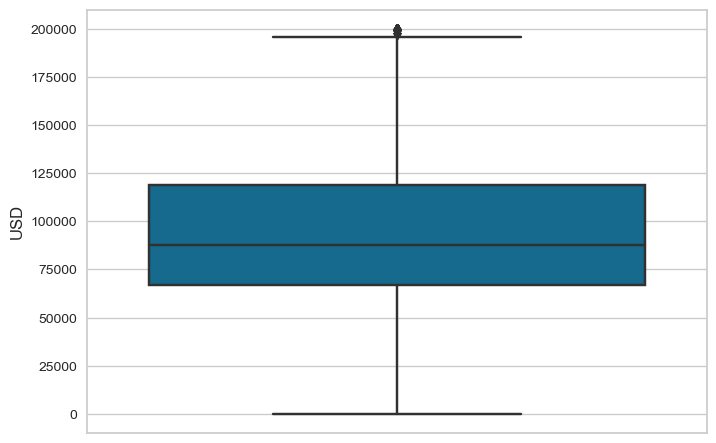

In [24]:
sns.boxplot(y='USD',data=model_df)

<Axes: xlabel='USD', ylabel='Count'>

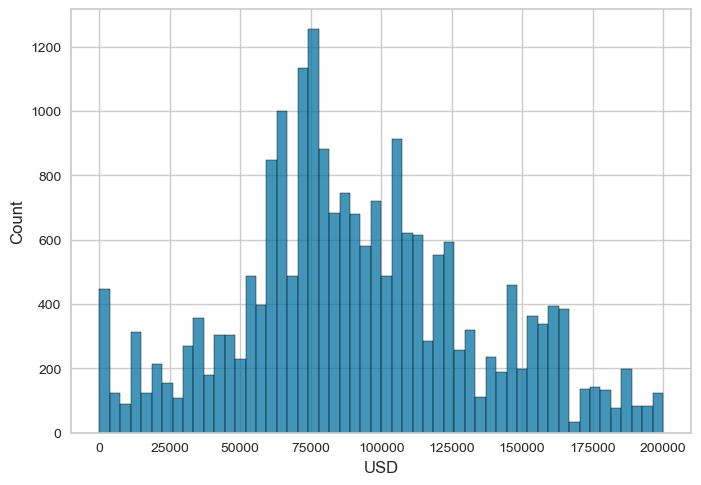

In [25]:
sns.histplot(x='USD',data=model_df)

In [26]:
model_df.corr()

,Quan_encode,TinhTrangBDS_encode,Loai_encode,GiayTo_encode,DienTich,PhongTam,Phongngu,USD
Quan_encode,1.00,0.00,0.01,-0.04,-0.01,-0.00,-0.00,0.05
TinhTrangBDS_encode,0.00,1.00,0.10,0.12,0.16,0.11,0.11,0.25
Loai_encode,0.01,0.10,1.00,-0.03,0.09,0.03,-0.00,0.12
GiayTo_encode,-0.04,0.12,-0.03,1.00,0.05,0.01,0.04,-0.02
DienTich,-0.01,0.16,0.09,0.05,1.00,0.62,0.68,0.45
PhongTam,-0.00,0.11,0.03,0.01,0.62,1.00,0.68,0.28
Phongngu,-0.00,0.11,-0.00,0.04,0.68,0.68,1.00,0.28
USD,0.05,0.25,0.12,-0.02,0.45,0.28,0.28,1.00


Feature selection

In [27]:
regression_data = d7_test[['PhongTam','DienTich','USD']]

In [28]:
x = regression_data[['PhongTam','DienTich']].values
y = regression_data['USD'].values

In [29]:
scaled_x = scale.fit_transform(x)
scaled_x

array([[ 0.21511764, -0.75973955],
       [ 0.21511764,  0.30440043],
       [ 0.21511764, -0.75973955],
       ...,
       [ 0.21511764,  0.59323843],
       [ 0.21511764, -0.45569956],
       [ 0.21511764, -0.60771955]])

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_x,y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train,Y_train)

In [32]:
y_predict = reg.predict(X_test)
y_predict

array([108742.59653385, 131518.74584699,  93558.49699175, 150498.87027462,
        93558.49699175, 108970.35802698, 165682.96981672, 188459.11912987,
       108970.35802698, 177071.04447329, 104946.57164832, 161127.73995409,
       120130.67119042, 108970.35802698, 128932.70344496, 106844.58409108,
       154294.89516014, 108970.35802698,  93558.49699175, 211235.26844302,
       142906.82050357, 106156.55413181,  93558.49699175, 104946.57164832,
       159988.93248843, 178969.05691606, 108970.35802698, 161127.73995409,
        98564.50436076, 142906.82050357, 108970.35802698, 125426.12590573,
        98564.50436076, 108970.35802698, 163784.95737396, 106844.58409108,
       116334.6463049 , 108970.35802698, 177071.04447329,  83380.40481866,
       108970.35802698, 237807.44264169,  98564.50436076, 128932.70344496,
       142906.82050357, 104946.57164832, 108742.59653385, 275767.69149694,
        66986.32279307, 344096.13943639, 108970.35802698,  93558.49699175,
       203643.21867197,  

In [33]:
X_test

array([[ 2.15117643e-01, -4.55699556e-01],
       [ 2.15117643e-01,  3.60436585e-04],
       [ 2.15117643e-01, -7.59739551e-01],
       [ 2.15117643e-01,  3.80410430e-01],
       [ 2.15117643e-01, -7.59739551e-01],
       [ 2.15117643e-01, -4.51138956e-01],
       [ 2.15117643e-01,  6.84450426e-01],
       [ 2.15117643e-01,  1.14051042e+00],
       [ 2.15117643e-01, -4.51138956e-01],
       [ 2.15117643e-01,  9.12480422e-01],
       [ 2.15117643e-01, -5.31709555e-01],
       [ 2.15117643e-01,  5.93238427e-01],
       [ 2.15117643e-01, -2.27669560e-01],
       [ 2.15117643e-01, -4.51138956e-01],
       [-2.16122866e+00, -3.79689557e-01],
       [ 2.15117643e-01, -4.93704555e-01],
       [ 2.15117643e-01,  4.56420429e-01],
       [ 2.15117643e-01, -4.51138956e-01],
       [ 2.15117643e-01, -7.59739551e-01],
       [ 2.15117643e-01,  1.59657041e+00],
       [ 2.15117643e-01,  2.28390433e-01],
       [-2.16122866e+00, -8.35749550e-01],
       [ 2.15117643e-01, -7.59739551e-01],
       [ 2.

In [34]:
Y_test

array([1.12500e+05, 1.62500e+05, 8.33330e+04, 1.02500e+05, 8.33330e+04,
       1.18750e+05, 1.24583e+05, 2.29167e+05, 1.18750e+05, 1.62500e+05,
       1.11250e+05, 2.04167e+05, 1.19167e+05, 1.18750e+05, 1.01667e+05,
       9.08330e+04, 1.64583e+05, 1.18750e+05, 8.33330e+04, 1.29167e+05,
       1.87500e+05, 1.45833e+05, 8.33330e+04, 1.11250e+05, 1.97917e+05,
       1.54167e+05, 1.18750e+05, 2.04167e+05, 8.95830e+04, 1.24583e+05,
       1.18750e+05, 1.25000e+05, 9.37500e+04, 1.18750e+05, 1.58333e+05,
       8.75000e+04, 1.45833e+05, 1.18750e+05, 1.37500e+05, 6.04170e+04,
       1.18750e+05, 2.41667e+05, 1.12500e+05, 9.45830e+04, 1.14583e+05,
       1.12500e+05, 1.45833e+05, 3.04167e+05, 6.45830e+04, 4.37500e+05,
       1.18750e+05, 8.33330e+04, 2.16667e+05, 8.33330e+04, 2.04167e+05,
       1.18750e+05, 2.04167e+05, 6.66670e+04, 7.41670e+04, 8.33330e+04,
       1.25000e+05, 8.33330e+04, 1.83333e+05, 8.33330e+04, 3.95830e+04,
       1.06250e+05, 8.12500e+04, 1.09583e+05, 2.04167e+05, 4.583

Evaluation(r2,MAE)

In [35]:
from sklearn.metrics import r2_score

In [36]:
r2_score(Y_test,y_predict)*100

57.47585600037426

In [37]:
from sklearn.metrics import mean_absolute_error

In [38]:
mean_absolute_error(Y_test,y_predict)

33925.87436696339

In [39]:
Y_test.mean()

136684.86497890294

In [40]:
100 - (33925.874366963384/136684.86497890294)*100

75.17949454593983

In [41]:
model_df

,Quan_encode,TinhTrangBDS_encode,Loai_encode,GiayTo_encode,DienTich,PhongTam,Phongngu,USD
0,13,1,2,2,62.00,2.00,2.00,"83,333.00"
2,17,0,2,0,75.00,2.00,2.00,"107,500.00"
3,21,1,2,1,70.00,1.00,1.00,"166,667.00"
4,12,1,2,2,83.00,2.00,2.00,"122,917.00"
5,14,1,2,1,71.00,1.00,2.00,"82,500.00"
...,...,...,...,...,...,...,...,...
24014,15,1,2,1,53.00,1.00,2.00,"87,500.00"
24015,0,1,2,2,76.00,1.00,2.00,"64,583.00"
24016,14,1,2,2,115.00,2.00,2.00,"137,500.00"
24017,16,1,2,2,82.00,2.00,2.00,"110,417.00"


In [42]:
X = model_df.iloc[:, 0:-1].values
Y = model_df.iloc[:, -1].values

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [44]:
reg = LinearRegression().fit(X_train,Y_train)

In [45]:
Y_predict = reg.predict(X_test)
Y_predict

array([ 97489.80775032,  90033.9573892 ,  88212.3893969 , ...,
       102278.13973481, 111318.85363612,  62852.35788939])

In [46]:
Y_test

array([120000.,  72917.,  68750., ...,  80000.,  77083.,  58750.])

In [47]:
r2_score(Y_test,Y_predict)*100

25.873999584345597

In [48]:
mean_absolute_error(Y_test,Y_predict)

28313.238160335197

In [49]:
Y_test.mean()

92943.88036380598

In [50]:
100 - (48660.219245692104/122128.48230641133)*100

60.15653488298723

In [53]:
from pycaret.regression import *

In [54]:
s = setup(model_df, target = 'USD')


,Description,Value
0,Session id,2953
1,Target,USD
2,Target type,Regression
3,Original data shape,"(21438, 8)"
4,Transformed data shape,"(21438, 8)"
5,Transformed train set shape,"(15006, 8)"
6,Transformed test set shape,"(6432, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [55]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,17860.0513,786912011.7332,28044.3524,0.5817,0.8519,7.8424,0.3690
rf,Random Forest Regressor,16473.9277,820780170.8713,28640.8780,0.5638,0.8490,7.7768,0.6970
knn,K Neighbors Regressor,18013.7980,894576108.8000,29903.9164,0.5245,0.8603,7.8632,0.0460
gbr,Gradient Boosting Regressor,20626.9479,895080958.0562,29910.4801,0.5243,0.8647,8.0284,0.3300
et,Extra Trees Regressor,16939.5657,897582725.3167,29948.3686,0.5229,0.8914,7.7773,0.6280
dt,Decision Tree Regressor,18145.4721,1096145514.8984,33097.9903,0.4173,1.0242,7.7206,0.0400
ada,AdaBoost Regressor,26633.6304,1239272381.1467,35196.6174,0.3415,0.8920,7.8269,0.1130
llar,Lasso Least Angle Regression,28444.9787,1409417561.6000,37529.8906,0.2509,0.9166,8.1422,0.0350
ridge,Ridge Regression,28444.9461,1409423462.4000,37529.9707,0.2509,0.9166,8.1422,0.0320
br,Bayesian Ridge,28440.1801,1409417740.8000,37529.8648,0.2509,0.9166,8.1417,0.0330


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

# **Classification**

In [68]:
class_train = pd.read_csv('https://raw.githubusercontent.com/maxtran1997gmail/Files/main/loan_train.csv')

In [69]:
class_train = class_train.iloc[:,2:]
class_train.head(5)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [70]:
class_test = pd.read_csv('https://raw.githubusercontent.com/maxtran1997gmail/Files/main/loan_test.csv')


In [72]:
class_test = class_test.iloc[:,2:]

In [73]:
class_test.head(5)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [74]:
class_train['loan_status'] = class_train['loan_status'].astype('category')
class_train['education'] = class_train['education'].astype('category')
class_train['Gender'] = class_train['Gender'].astype('category')
class_train['loan_status'] = class_train['loan_status'].cat.codes
class_train['education'] = class_train['education'].cat.codes
class_train['Gender'] = class_train['Gender'].cat.codes


In [79]:
class_train[['loan_status','Gender']].value_counts()

loan_status  Gender
1            1         215
0            1          79
1            0          45
0            0           7
dtype: int64

In [75]:
class_test['loan_status'] = class_test['loan_status'].astype('category')
class_test['education'] = class_test['education'].astype('category')
class_test['Gender'] = class_test['Gender'].astype('category')
class_test['loan_status'] = class_test['loan_status'].cat.codes
class_test['education'] = class_test['education'].cat.codes
class_test['Gender'] = class_test['Gender'].cat.codes

In [80]:
total_data = pd.concat([class_train,class_test])

In [81]:
total_data = total_data[['loan_status','Principal','terms','age','education','Gender']]

In [82]:
from pycaret.classification import *


In [84]:
s = setup(total_data, target='loan_status')

,Description,Value
0,Session id,7434
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(508, 6)"
4,Transformed data shape,"(1156, 6)"
5,Transformed train set shape,"(817, 6)"
6,Transformed test set shape,"(339, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [85]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8323,0.5382,1.0000,0.8323,0.9085,0.0000,0.0000,1.1920
ridge,Ridge Classifier,0.8323,0.0000,1.0000,0.8323,0.9085,0.0000,0.0000,0.0720
lda,Linear Discriminant Analysis,0.8323,0.5448,1.0000,0.8323,0.9085,0.0000,0.0000,0.0930
dummy,Dummy Classifier,0.8323,0.5000,1.0000,0.8323,0.9085,0.0000,0.0000,0.1020
ada,Ada Boost Classifier,0.8299,0.6439,0.9956,0.8328,0.9069,0.0055,0.0135,0.1590
nb,Naive Bayes,0.8275,0.5546,0.9941,0.8315,0.9055,-0.0082,-0.0103,0.0730
qda,Quadratic Discriminant Analysis,0.8176,0.6240,0.9676,0.8386,0.8982,0.0537,0.0582,0.0820
lightgbm,Light Gradient Boosting Machine,0.8176,0.7337,0.9588,0.8440,0.8972,0.0951,0.1114,0.3770
gbc,Gradient Boosting Classifier,0.8164,0.7096,0.9779,0.8314,0.8984,-0.0110,-0.0175,0.1630
knn,K Neighbors Classifier,0.8078,0.7095,0.9382,0.8479,0.8903,0.1160,0.1253,0.0740


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [86]:
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7434, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [87]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…